<center> <h1> UVOD U PODATKOVNU ZNANOST </h1>
<h2> Seminar - Analiza transkripata epizoda “Simpsona” </h2>
<h3> Ivona Grbeša Dragun </h3>

Link na podatke: https://www.kaggle.com/prashant111/the-simpsons-dataset?select=simpsons_characters.csv

In [201]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/seminar

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/seminar


In [202]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

Pogledajmo prvo podatke o epizodama.

In [203]:
data_e = pd.read_csv("simpsons_episodes.csv")
data_e.head(3)

id  ...    views
0  10  ...  50816.0
1  12  ...  62561.0
2  14  ...  59575.0

[3 rows x 14 columns]

In [204]:
print(data_e.shape)

(600, 14)


Izbacimo nepotrebne stupce i eventualne NaN-ove.

In [205]:
data_e.drop(['image_url', 'production_code', 'video_url'], axis=1, inplace=True)

In [206]:
data_e=data_e.dropna()

In [207]:
print(data_e.shape)

(593, 11)


Epizode imaju zajedničku numeraciju kroz sve sezone. Sortirajmo ih po toj numeraciji.

In [208]:
data_e.sort_values(['number_in_series'], inplace=True)
data_e.head()

id  imdb_rating  ...  us_viewers_in_millions     views
241   1          8.2  ...                    26.7  171408.0
242   2          7.8  ...                    24.5   91423.0
550   3          7.5  ...                    27.5   78072.0
243   4          7.8  ...                    20.2   67378.0
525   5          8.1  ...                    27.1   63129.0

[5 rows x 11 columns]

Pogledajmo kretanje IMDB ratinga po sezonama i prikažimo grafički.

In [209]:
grupirano=data_e.groupby(['season'], as_index=False)['imdb_rating'].mean()

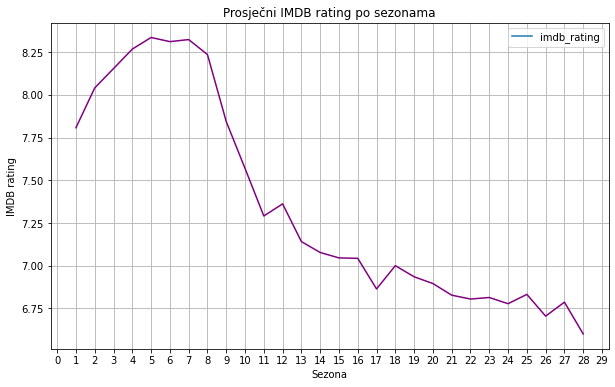

In [210]:
grupirano.plot('season','imdb_rating',figsize=(10,6))
plt.title('Prosječni IMDB rating po sezonama')
plt.xticks((np.arange(0, 30, step=1)))
plt.xlabel('Sezona')
plt.ylabel('IMDB rating')
plt.grid()
plt.gca().get_lines()[0].set_color("purple")
plt.show()

In [211]:
grupirano[grupirano.imdb_rating==grupirano.imdb_rating.max()]

season  imdb_rating
4       5     8.336364

Najuspješnija sezona prema IMDB ratingu je peta, s prosječnom ocjenom 8.336364.

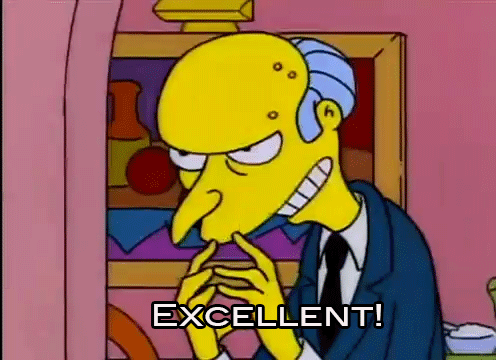

IMDB rating bio je bolji kroz prvih 8 sezona, nakon čega je naglo počeo padati. Najbolji IMDB rating, viši od 8.25, imaju peta i sedma sezona. Unatoč sveukupnom slabijem ratingu, zadnjih 20-ak sezona međusobno imaju slične IMDB ocjene i imaju svojih dobrih epizoda, što vidimo iz sljedećeg.

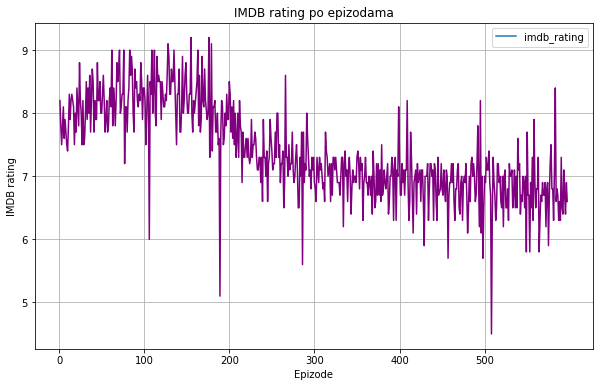

In [212]:
data_e.plot('number_in_series', 'imdb_rating', figsize=(10,6))
plt.title('IMDB rating po epizodama')
plt.xticks((np.arange(0, 600, step=100)))
plt.xlabel('Epizode')
plt.ylabel('IMDB rating')
plt.grid()
plt.gca().get_lines()[0].set_color("purple")
plt.show()

IMDB rating po epizodama također prati padajući trend ali nešto blaže nego kad smo promatrali rating po sezonama. Među kasnijim epizodama ima stršećih vrijednosti, tj. uspješnih epizoda - nešto prije 200. epizode te oko 400. i 500. epizode.

Pogledajmo koja epizoda je najuspješnija.

In [213]:
data_e[data_e.imdb_rating==data_e.imdb_rating.max()]

id  imdb_rating  ...  us_viewers_in_millions    views
535  155          9.2  ...                    13.9  79609.0
537  176          9.2  ...                    11.8  74177.0

[2 rows x 11 columns]

Dvije epizode imaju najbolji rating, You Only Move Twice i Homer's Enemy. Obje su iz osme sezone, nakon koje rating naglo počinje padati.

In [214]:
data_e[data_e.imdb_rating==data_e.imdb_rating.min()]

id  imdb_rating  ...  us_viewers_in_millions    views
193  508          4.5  ...                    4.82  44434.0

[1 rows x 11 columns]

Najgore ocijenjena epizoda je Lisa Goes Gaga, iz 23.sezone, s ocjenom 4.5.

Pogledajmo kako se kretao broj gledatelja na uzorku gledatelja iz SAD-a.

In [215]:
grupirano1=data_e.groupby(['season'], as_index=False)['us_viewers_in_millions'].mean()

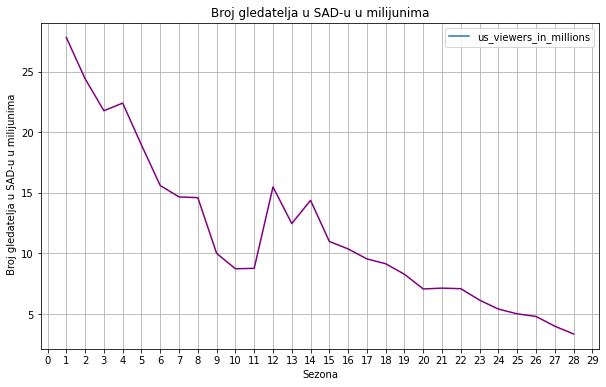

In [216]:
grupirano1.plot('season','us_viewers_in_millions',figsize=(10,6))
plt.title('Broj gledatelja u SAD-u u milijunima')
plt.xticks((np.arange(0, 30, step=1)))
plt.xlabel('Sezona')
plt.ylabel(' Broj gledatelja u SAD-u u milijunima')
plt.grid()
plt.gca().get_lines()[0].set_color("purple")
plt.show()

I broj gledatelja značajno je padao. Nakon 11.sezone broj gledatelja naglo raste do otprilike 15 milijuna, no već nakon 15. sezone počinje padati. 

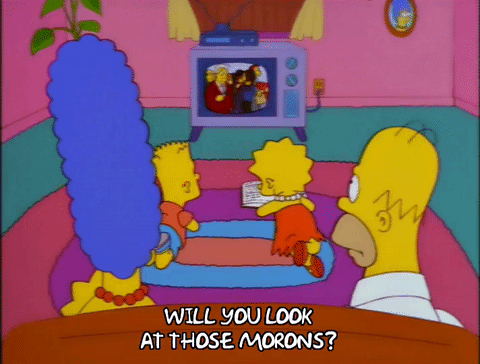

In [217]:
grupirano1[grupirano1.us_viewers_in_millions==grupirano1.us_viewers_in_millions.max()]

season  us_viewers_in_millions
0       1               27.807692

Prva sezona bila je najgledanija, s više od 27 milijuna gledatelja iz SAD-a.

In [218]:
data_e[data_e.us_viewers_in_millions==data_e.us_viewers_in_millions.max()]

id  imdb_rating  ...  us_viewers_in_millions    views
2  14          8.2  ...                    33.6  59575.0

[1 rows x 11 columns]

Najgledanija epizoda je Bart Gets an "F", s čak 33 milijuna gledatelja. 

In [219]:
data_e[data_e.us_viewers_in_millions==data_e.us_viewers_in_millions.min()]

id  imdb_rating  ...  us_viewers_in_millions  views
518  591          6.5  ...                    2.32  190.0

[1 rows x 11 columns]

Najmanje gledana epizoda je The Burns Cage, sa samo 2 milijuna gledatelja.

Analizirajmo likove i njihove rečenice.

In [220]:
data_c = pd.read_csv("simpsons_characters.csv")
data_c.head()

id              name   normalized_name gender
0   7          Children          children    NaN
1  12  Mechanical Santa  mechanical santa    NaN
2  13        Tattoo Man        tattoo man    NaN
3  16  DOCTOR ZITSOFSKY  doctor zitsofsky    NaN
4  20          Students          students    NaN

In [221]:
print(data_c.shape)

(6722, 4)


Uočimo da manje važni likovi nemaju naveden spol pa radi računanja udjela muških i ženskih likova izbacimo NaN-ove.

In [222]:
data_c=data_c.dropna()
print(data_c.shape)

(323, 4)


In [223]:
data_c.head(10)

id                 name      normalized_name gender
70   1        Marge Simpson        marge simpson      f
71   8         Bart Simpson         bart simpson      m
72   9         Lisa Simpson         lisa simpson      f
73  17          Moe Szyslak          moe szyslak      m
74   3      Seymour Skinner      seymour skinner      m
75  11         Ned Flanders         ned flanders      m
76  31       Grampa Simpson       grampa simpson      m
77  71         Chief Wiggum         chief wiggum      m
78  25  Milhouse Van Houten  milhouse van houten      m
79  14      Waylon Smithers      waylon smithers      m

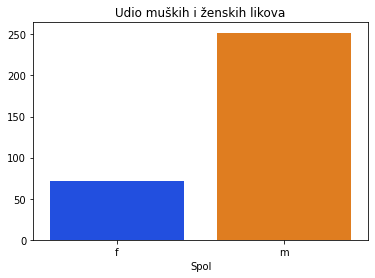

In [224]:
sns.countplot(x=data_c.gender, palette="bright")
plt.title('Udio muških i ženskih likova')
plt.xlabel('Spol')
plt.ylabel('')
plt.show()

Iz stupčastog dijagrama vidimo da su preko tri četvrtine likova u seriji muški likovi.

Učitajmo sad linije teksta likova u seriji.

In [225]:
data_sl=pd.read_csv("simpsons_script_lines.csv")
data_sl.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id  ...  word_count
0  9549  ...          31
1  9550  ...           3
2  9551  ...          22
3  9552  ...           5
4  9553  ...          33

[5 rows x 13 columns]

In [226]:
print(data_sl.shape)

(158271, 13)


Izbacimo eventualne NaN-ove i nepotrebne stupce.

In [ ]:
data_sl.drop(['id', 'episode_id', 'raw_text','timestamp_in_ms','speaking_line'], axis=1,inplace=True)

In [ ]:
data_sl=data_sl.dropna()

In [ ]:
print(data_sl.shape)

(131708, 8)


Pogledajmo koji likovi se najčešće pojavljuju, tj. imaju najviše linija teksta na razini cijele serije.

In [ ]:
grupirano2=data_sl.groupby('raw_character_text')['raw_character_text'].count().sort_values(ascending=False)

In [ ]:
najcesci=grupirano2.head(15)

In [ ]:
najcesci

raw_character_text
Homer Simpson             27844
Marge Simpson             13168
Bart Simpson              12997
Lisa Simpson              10751
C. Montgomery Burns        3086
Moe Szyslak                2808
Seymour Skinner            2387
Ned Flanders               2053
Grampa Simpson             1802
Chief Wiggum               1796
Milhouse Van Houten        1747
Krusty the Clown           1686
Nelson Muntz               1145
Lenny Leonard              1143
Apu Nahasapeemapetilon      988
Name: raw_character_text, dtype: int64

Očekivano, najviše linija teksta imaju članovi obitelji Simpsons, Homer, Marge, Bart i Lisa. Prikažimo to grafički.

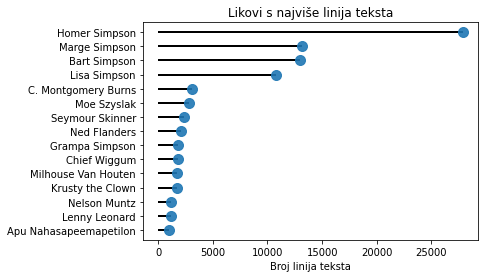

In [ ]:
fig, ax = plt.subplots()
ax.hlines(najcesci.index, xmin=0, xmax=najcesci.values, linewidth=2)
ax.plot(najcesci.values, najcesci.index, 'o', markersize=10, alpha=0.9)
ax.invert_yaxis()
ax.set_title('Likovi s najviše linija teksta')
ax.set_xlabel('Broj linija teksta')
plt.show()

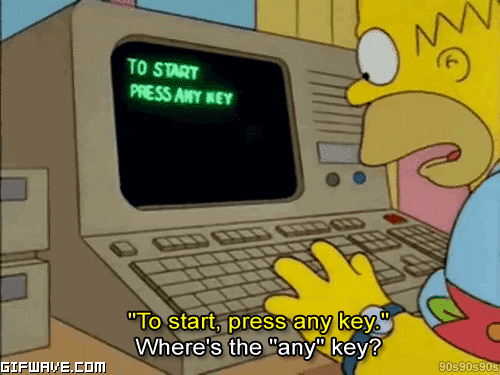

Analizirajmo stupac spoken_words da dobijemo najčešće riječi.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import tokenize
word_tokenizer = tokenize.TreebankWordTokenizer() 
import string 

In [ ]:
from wordcloud import WordCloud

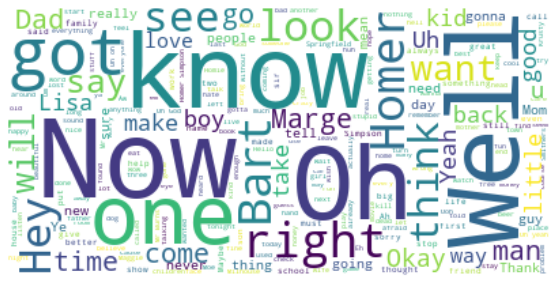

In [ ]:
text = " ".join(line for line in data_sl.spoken_words) #spojimo sve recenice koje su u stupcu spoken_words u cjeloviti tekst i to analizirajmo
plt.figure(figsize=[10,5])
wordcloud = WordCloud(max_words=1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nakon nekih općenitih i inače čestih riječi u razgovornom jeziku (now, one, oh, right, know, got, look, well...) slijede imena glavnih likova, prezimena i imenice koje predstavljaju odnose u obitelji.

Izbrojimo koliko je ukupno riječi te odvojimo rečenice na tokene.

In [ ]:
sentences = tokenize.sent_tokenize(text) # podijeli tekst na rečenice
sentences_with_words = word_tokenizer.tokenize_sents(sentences) # podijeli rečenice na tokene

In [ ]:
words = [word for sentence in sentences_with_words for word in sentence] #u ovu listu spremi sve rijeci iz svih recenica
unique_words = set(words)

In [ ]:
print("Broj riječi (tokena):", len(words))
print("Broj jedinstvenih riječi (tokena):", len(unique_words))

Broj riječi (tokena): 1723440
Broj jedinstvenih riječi (tokena): 58626


Jedinstvenih riječi ima skoro 60000.

In [ ]:
# prebrojimo koliko puta se javlja koji token
word_freq = {} #"rjecnik"
for word in words:
  word_freq[word] = word_freq.get(word, 0) + 1 #za svaku rijec spremi u uredeni par rijec na 1.koordinatu i broj pojavljivanja na 2.koordinatu
word_freq = list(word_freq.items())
# word_freq je lista s elementima oblika (rijec, frekvencija)

In [ ]:
from collections import Counter
counter_words = Counter()

for word in words:
    if word not in string.punctuation: #ako nije punctuation
      counter_words.update({word}) #spremamo rijec u listu

counter_words.most_common(10)

[('I', 51792),
 ('the', 36867),
 ('you', 35030),
 ('a', 28756),
 ("'s", 27332),
 ('to', 26359),
 ('...', 19822),
 ("n't", 15698),
 ('of', 15632),
 ('it', 15399)]

Očekivano, prvom i najopćenitijom analizom dobijemo da su najčešće riječi veznici i prijedlozi, članovi i skraćeni oblici glagola. Grafički to izgleda ovako:


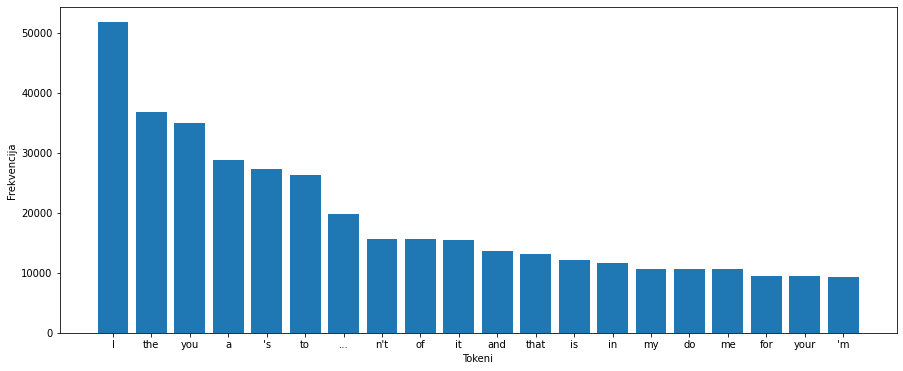

In [ ]:
xs=[x for x, y in counter_words.most_common(20)] #po prvih 20 ur.parova (elementima liste), u xs spremimo prve koordinate tj rijeci
ys=[y for x, y in counter_words.most_common(20)] #a u listu ys spremimo pripadajuce frekvencije tih rijeci

plt.subplots(figsize=(15,6))
plt.bar(x=xs[:20], height=ys[:20])
plt.xlabel("Tokeni")
plt.ylabel("Frekvencija")
plt.show()

Za bolji uvid u najčešće teme i spominjane riječi pogledat ćemo tagirane rečenice. Iz njih ćemo izvući najčešće imenice, glagole, pridjeve.

In [ ]:
from nltk import pos_tag_sents  
nltk.download('averaged_perceptron_tagger')
tagged_sentences = pos_tag_sents(sentences_with_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
        if word_type_tag in tag and len(word) > 4:
            counter.update({word})
  return counter

In [ ]:
count_word_type(tagged_sentences, "NN").most_common(15) #najcescih 15 imenica

[('Homer', 4101),
 ('Marge', 2670),
 ('Simpson', 2218),
 ('something', 1503),
 ('right', 1462),
 ('thing', 1444),
 ('people', 1376),
 ('Springfield', 1008),
 ('money', 978),
 ('school', 942),
 ('family', 842),
 ('house', 803),
 ('anything', 766),
 ('things', 760),
 ('years', 758)]

In [ ]:
count_word_type(tagged_sentences, "JJ").most_common(15)  # 15 najcescih pridjeva

[('little', 2080),
 ('right', 1275),
 ('great', 1022),
 ('first', 816),
 ('other', 777),
 ('sorry', 776),
 ('better', 646),
 ('wrong', 555),
 ('happy', 471),
 ('whole', 450),
 ('stupid', 400),
 ('young', 372),
 ('afraid', 359),
 ('least', 338),
 ('beautiful', 329)]

In [ ]:
count_word_type(tagged_sentences, "VB").most_common(15) # 15 najcescih glagola

[('think', 2653),
 ('going', 1779),
 ('thought', 854),
 ('doing', 829),
 ('guess', 737),
 ('believe', 723),
 ('worry', 598),
 ('being', 532),
 ('getting', 530),
 ('remember', 511),
 ('wanted', 441),
 ('leave', 436),
 ('trying', 429),
 ('talking', 418),
 ('coming', 414)]

Najučestalije imenice, pridjevi i glagoli dobro opisuju teme i radnju serije. Uz vlastita imena glavnih likova i prezime Simpsons, najčešće se pojavljuju riječi vezane za obiteljski život i svakodnevne obaveze (people, Springfield, house, school, money, family, guess, worry, remember, happy, stupid).

Prikažimo najčešće glagole, pridjeve i imenice redom pomoću WordClouda.

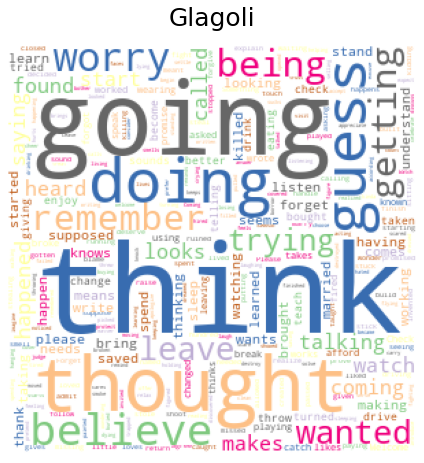

In [ ]:
counter=count_word_type(tagged_sentences, "VB")
fig=plt.figure(figsize=(6,10))
wc=WordCloud(width=300, height=300, max_words=1000, colormap="Accent", background_color="white").generate_from_frequencies(counter)
plt.imshow(wc)
plt.axis("off")
plt.title("Glagoli", fontsize=25, pad=20)
plt.tight_layout()
plt.show()

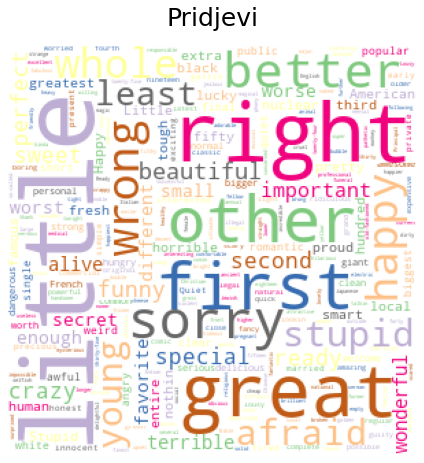

In [ ]:
counter=count_word_type(tagged_sentences, "JJ")
fig=plt.figure(figsize=(6,10))
wc=WordCloud(width=300, height=300, max_words=1000, colormap="Accent", background_color="white").generate_from_frequencies(counter)
plt.imshow(wc)
plt.axis("off")
plt.title("Pridjevi", fontsize=25, pad=20)
plt.tight_layout()
plt.show()

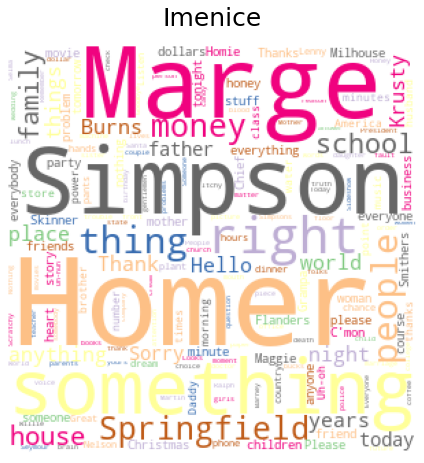

In [ ]:
counter=count_word_type(tagged_sentences, "NN")
fig=plt.figure(figsize=(6,10))
wc=WordCloud(width=300, height=300, max_words=1000, colormap="Accent", background_color="white").generate_from_frequencies(counter)
plt.imshow(wc)
plt.axis("off")
plt.title("Imenice", fontsize=25, pad=20)
plt.tight_layout()
plt.show()

Pronađimo najčešće bigrame i trigrame.

In [ ]:
counter_bigrams = Counter()
for sentence in tagged_sentences:
  list1 = [w for w in sentence[:-1]] #sve rijeci osim zadnje
  list2 = [w for w in sentence[1:]] #sve rijeci osim prve
  bigrams = list(zip(list1, list2)) #lista ur.parova
  #print(bigrams) #ur.parovi uredenih parova
  for w1, w2 in bigrams:
    if len(w1[0])>1 and len(w2[1])>1: #izbacujemo tockazareze zagrade itd
      bigram = w1[0]+" "+w2[0] #spojimo te 2 rijeci koje dolaze skupa i izmedu njih postavimo razmak
      counter_bigrams.update({bigram}) #i to dodamo u listu izbrojenih bigrama

counter_bigrams.most_common(10)

[("do n't", 5251),
 ("It 's", 3411),
 ("it 's", 3067),
 ("you 're", 3029),
 ('in the', 2891),
 ('gon na', 2550),
 ("That 's", 2455),
 ("ca n't", 2423),
 ('of the', 2170),
 ("'s a", 2099)]

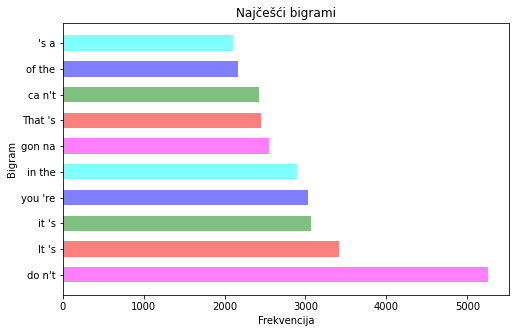

In [ ]:
xs=[x for x, y in counter_bigrams.most_common(10)]
ys=[y for x, y in counter_bigrams.most_common(10)]
plt.subplots(figsize=(8, 5)) 
plt.barh(y=xs, width=ys, height=0.6, alpha = 0.5, color=['magenta', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Frekvencija')
plt.ylabel('Bigram')
plt.title('Najčešći bigrami')
plt.show()

Za najčešće bigrame dobili smo neke izraze koji povezuju rečenične strukture bez da govore puno o sadržaju (uglavnom veznici i osnovni glagoli). Zato pogledajmo koji su najčešći bigrami oblik pridjev+imenica i prikažimo ih WordCloudom.

In [ ]:
counter = Counter()
for sentence in tagged_sentences:
  list1 = [w for w in sentence[:-1]]
  list2 = [w for w in sentence[1:]]
  bigrams = list(zip(list1, list2))
  for w1, w2 in bigrams:
    if "JJ" in w1[1] and "NN" in w2[1] and len(w1[0])>1 and len(w2[0])>1:  #provjera je li prvi dio bigrama pridjev a drugi imenica
      bigram = w1[0]+" "+w2[0]
      counter.update({bigram})

counter.most_common(10)

[('little girl', 126),
 ('old man', 126),
 ('last night', 108),
 ('best friend', 105),
 ('only thing', 87),
 ('last time', 85),
 ('first time', 76),
 ('little boy', 71),
 ('young man', 69),
 ('high school', 63)]

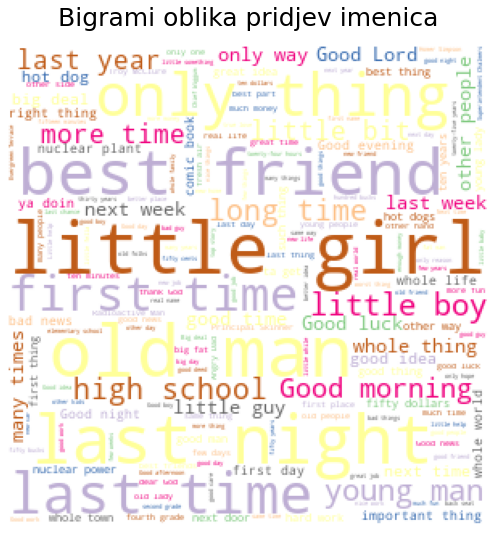

In [ ]:
#counter=count_word_type(tagged_sentences, "NN")
fig=plt.figure(figsize=(7,10))
wc=WordCloud(width=300, height=300, max_words=1000, colormap="Accent", background_color="white").generate_from_frequencies(counter)
plt.imshow(wc)
plt.axis("off")
plt.title("Bigrami oblika pridjev imenica", fontsize=25, pad=20)
plt.tight_layout()
plt.show()

Vidimo da su najčešći bigrami ponovo vezani uz rutinu Simpsonsa i svakodnevne događaje - best friend, old man, high school, good idea, bad news, last week, little girl. 

Pogledajmo koji su najčešći trigrami...

In [ ]:
from collections import Counter
counter_trigrams=Counter()
for sentence in tagged_sentences:
  list1=[w for w in sentence[:-2]]
  list2=[w for w in sentence[1:-1]]
  list3=[w for w in sentence[2:]]
  trigrams=list(zip(list1, list2, list3)) 
  for w1, w2, w3 in trigrams:
    if len(w1[0])>3 and len(w2[0])>2 and len(w3[0])>3:
      trigram=w1[0]+" "+w2[0]+" "+w3[0]
      counter_trigrams.update({trigram})

counter_trigrams.most_common(15)

[('What the hell', 119),
 ('would you like', 104),
 ('Itchy and Scratchy', 100),
 ('Krusty the Clown', 81),
 ('Ladies and gentlemen', 73),
 ('Would you like', 72),
 ('tell you what', 59),
 ('thought you were', 53),
 ("have n't seen", 50),
 ("should n't have", 43),
 ("does n't mean", 39),
 ('What was that', 39),
 ('think you should', 39),
 ("would n't have", 37),
 ("have n't been", 37)]

Iz trigrama se već da naslutiti karakter serije, humor i satira. 

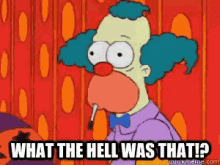

...i najčešći tetragrami (4 riječi).

In [ ]:
counter_tetragrams=Counter()
for sentence in tagged_sentences:
  list1=[w for w in sentence[:-3]]
  list2=[w for w in sentence[1:-2]]
  list3=[w for w in sentence[2:-1]]
  list4=[w for w in sentence[3:]]
  tetragrams=list(zip(list1, list2, list3, list4))
  for w1, w2, w3, w4 in tetragrams:
    if len(w1[0])>2 and len(w2[0])>2 and len(w3[0])>2 and len(w4[0])>2:
      tetragram=w1[0] + " " + w2[0] + " " + w3[0] + " " + w4[0]
      counter_tetragrams.update({tetragram})

counter_tetragrams.most_common(15)

[('What are you doing', 144),
 ('what are you doing', 98),
 ('Why you little ...', 95),
 ('are you talking about', 73),
 ('are you doing here', 61),
 ('What are you talking', 58),
 ('the hell are you', 49),
 ('Are you sure you', 39),
 ("'ll tell you what", 36),
 ("Why did n't you", 36),
 ("know what you 're", 32),
 ('What the hell are', 30),
 ('What are you gon', 28),
 ("n't know what you", 27),
 ("you think you 're", 27)]

Pogledajmo najčešća vlastita imena.

In [ ]:
# NNP (jednina) i NNPS (mnozina)
counter=Counter()
for sentence in tagged_sentences:
  sve=[w for w in sentence]
  lista_sve=list(sve) #lista tagiranih rijeci
  for w1 in lista_sve:
    if ("NNP" in w1[1] or "NNPS" in w1[1]) and len(w1[0])>1:
      counter.update({w1})

counter.most_common(10)

[(('Homer', 'NNP'), 3742),
 (('Hey', 'NNP'), 3596),
 (('Bart', 'NNP'), 3261),
 (('Dad', 'NNP'), 2200),
 (('Simpson', 'NNP'), 2165),
 (('Lisa', 'NNP'), 2043),
 (('Marge', 'NNP'), 1998),
 (('Okay', 'NNP'), 1672),
 (('Mr.', 'NNP'), 1518),
 (('Uh', 'NNP'), 1290)]

Četiri najčešća lika su Homer, Marge, Bart i Lisa pa pogledajmo koje su najfrekventnije riječi koje oni koriste.

Najčešće riječi koje Homer koristi...

In [ ]:
homer_sl=data_sl[data_sl.raw_character_text=='Homer Simpson'] # Homer script lines

In [ ]:
text = " ".join(line for line in homer_sl.spoken_words)

In [ ]:
sentences = tokenize.sent_tokenize(text) # podijeli tekst na rečenice
sentences_with_words = word_tokenizer.tokenize_sents(sentences)

In [ ]:
words = [word for sentence in sentences_with_words for word in sentence] #u ovu listu spremi sve rijeci iz svih recenica
unique_words = set(words)

In [ ]:
tagged_sentences = pos_tag_sents(sentences_with_words)

In [ ]:
def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
        if word_type_tag in tag and len(word) > 4:
            counter.update({word})
  return counter

In [ ]:
count_word_type(tagged_sentences, "NN").most_common(10) # 10 najcescih Homerovih imenica

[('Marge', 1817),
 ('thing', 404),
 ('something', 382),
 ('right', 374),
 ('Flanders', 301),
 ('people', 282),
 ('Homer', 274),
 ('money', 249),
 ('honey', 237),
 ('family', 237)]

In [ ]:
from collections import Counter
counter_trigrams=Counter()
for sentence in tagged_sentences:
  list1=[w for w in sentence[:-2]]
  list2=[w for w in sentence[1:-1]]
  list3=[w for w in sentence[2:]]
  trigrams=list(zip(list1, list2, list3)) 
  for w1, w2, w3 in trigrams:
    if len(w1[0])>3 and len(w2[0])>2 and len(w3[0])>3:
      trigram=w1[0]+" "+w2[0]+" "+w3[0]
      counter_trigrams.update({trigram})

counter_trigrams.most_common(5) # 5 najcescih Homerovih trigrama

[('What the hell', 46),
 ('would you like', 14),
 ("D'OH D'OH D'OH", 14),
 ("does n't matter", 12),
 ("does n't mean", 11)]

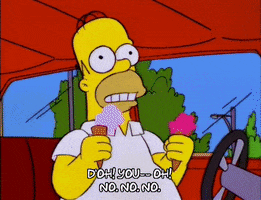

Iako je uglavnom karakteriziran kao lijen i ignorantan glavni lik, iz dobivenog se može uočiti Homerova zbunjenost, privrženost Marge i obitelji.

Najčešće imenice koje koristi Marge...

In [ ]:
marge_sl=data_sl[data_sl.raw_character_text=='Marge Simpson']

In [ ]:
text = " ".join(line for line in marge_sl.spoken_words)

In [ ]:
sentences = tokenize.sent_tokenize(text) # podijeli tekst na rečenice
sentences_with_words = word_tokenizer.tokenize_sents(sentences)

In [ ]:
words = [word for sentence in sentences_with_words for word in sentence] #u ovu listu spremi sve rijeci iz svih recenica
unique_words = set(words)

In [ ]:
tagged_sentences = pos_tag_sents(sentences_with_words)

In [ ]:
def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
        if word_type_tag in tag and len(word) > 4:
            counter.update({word})
  return counter

In [ ]:
count_word_type(tagged_sentences, "NN").most_common(10)

[('Homer', 1368),
 ('Homie', 533),
 ('something', 234),
 ('father', 200),
 ('Maggie', 180),
 ('house', 169),
 ('thing', 150),
 ('people', 146),
 ('family', 136),
 ('honey', 133)]

In [ ]:
from collections import Counter
counter_trigrams=Counter()
for sentence in tagged_sentences:
  list1=[w for w in sentence[:-2]]
  list2=[w for w in sentence[1:-1]]
  list3=[w for w in sentence[2:]]
  trigrams=list(zip(list1, list2, list3)) 
  for w1, w2, w3 in trigrams:
    if len(w1[0])>3 and len(w2[0])>2 and len(w3[0])>3:
      trigram=w1[0]+" "+w2[0]+" "+w3[0]
      counter_trigrams.update({trigram})

counter_trigrams.most_common(5) # 5 Margeinih najcescih trigrama

[('think you should', 20),
 ('would you like', 14),
 ('Would you like', 14),
 ('have you been', 11),
 ('maybe you should', 11)]

Marge najčešće spominje Homera, odmilja ga nazivajući Homie,a zatim slijede obitelj i djeca. Iz najčešćih trigrama vidi se njena opreznost, brižnost i ljubav prema obitelji.

Zatim Bart...

In [ ]:
bart_sl=data_sl[data_sl.raw_character_text=='Bart Simpson']

In [ ]:
text = " ".join(line for line in bart_sl.spoken_words)

In [ ]:
sentences = tokenize.sent_tokenize(text) # podijeli tekst na rečenice
sentences_with_words = word_tokenizer.tokenize_sents(sentences)

In [ ]:
words = [word for sentence in sentences_with_words for word in sentence] #u ovu listu spremi sve rijeci iz svih recenica
unique_words = set(words)

In [ ]:
tagged_sentences = pos_tag_sents(sentences_with_words)

In [ ]:
def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
        if word_type_tag in tag and len(word) > 4:
            counter.update({word})
  return counter

In [ ]:
count_word_type(tagged_sentences, "NN").most_common(10)

[('Milhouse', 264),
 ('Homer', 182),
 ('Krusty', 174),
 ('something', 162),
 ('school', 152),
 ('thing', 131),
 ('right', 122),
 ('people', 112),
 ('Simpson', 104),
 ('Thanks', 96)]

Bart najčešćće spominje Milhousea, svog najboljeg prijatelja, oca Homera i klauna Krustyja koji je domaćin njegove omiljene TV serije.

...i Lisa.

In [ ]:
lisa_sl=data_sl[data_sl.raw_character_text=='Lisa Simpson']

In [ ]:
text = " ".join(line for line in lisa_sl.spoken_words)

In [ ]:
sentences = tokenize.sent_tokenize(text) # podijeli tekst na rečenice
sentences_with_words = word_tokenizer.tokenize_sents(sentences)
words = [word for sentence in sentences_with_words for word in sentence] #u ovu listu spremi sve rijeci iz svih recenica
unique_words = set(words)

In [ ]:
tagged_sentences = pos_tag_sents(sentences_with_words)

In [ ]:
def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
        if word_type_tag in tag and len(word) > 4:
            counter.update({word})
  return counter

In [ ]:
count_word_type(tagged_sentences, "NN").most_common(10)

[('something', 148),
 ('people', 142),
 ('school', 129),
 ('thing', 119),
 ('Maggie', 104),
 ('anything', 86),
 ('Springfield', 85),
 ('Simpson', 79),
 ('family', 79),
 ('Grampa', 77)]

Lisa je inteligentna, sklona diskusiji, često spominje članove svoje obitelji, no najviše jer se njeni stavovi kose s njihovima.

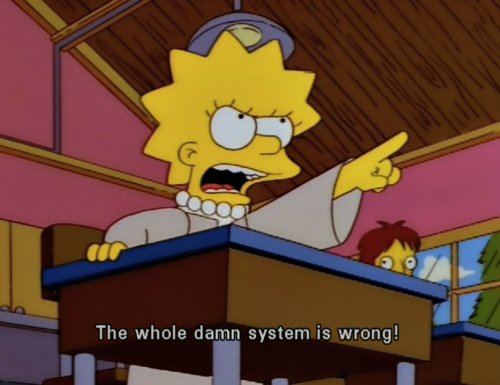

Učitajmo tablicu s lokacijama i izdvojimo one na kojima se odvija najveći dio radnje.

In [ ]:
data_l=pd.read_csv("simpsons_locations.csv")
data_l.head(10)

id                             name                  normalized_name
0   1                           Street                           street
1   2                              Car                              car
2   3    Springfield Elementary School    springfield elementary school
3   4                       Auditorium                       auditorium
4   5                     Simpson Home                     simpson home
5   6                          KITCHEN                          kitchen
6   7        SHOPPING MALL PARKING LOT        shopping mall parking lot
7   8                 Springfield Mall                 springfield mall
8   9   The Happy Sailor Tattoo Parlor   the happy sailor tattoo parlor
9  10  Springfield Nuclear Power Plant  springfield nuclear power plant

Vidimo da su u ovoj tablici sve lokacije samo nabrojane (vjerojatno jednom) pa za uvid u to koje su najčešće koristit ćemo tablicu s transkriptima i njen stupac raw_location_text (svaka rečenica ima pripadajuće navedeno mjesto radnje).

In [ ]:
location = data_sl.groupby('raw_location_text')['raw_location_text'].count().sort_values(ascending=False)
location.head(10) # frequent location

raw_location_text
Simpson Home                       30153
Springfield Elementary School       5970
Moe's Tavern                        3997
Springfield Nuclear Power Plant     3031
Kwik-E-Mart                         1258
Simpson Living Room                 1172
First Church of Springfield         1150
Springfield Street                  1032
Simpson Car                          998
Springfield                          996
Name: raw_location_text, dtype: int64

In [ ]:
f_location=location.head(15) #frequent location

Najčešće lokacije su dom Simpsona, Osnovna škola u Springfieldu, Moeova konoba i Springfield nuklearna elektrana. Pogledajmo grafički prikaz.

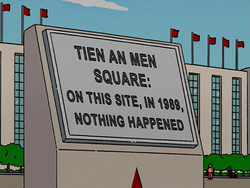

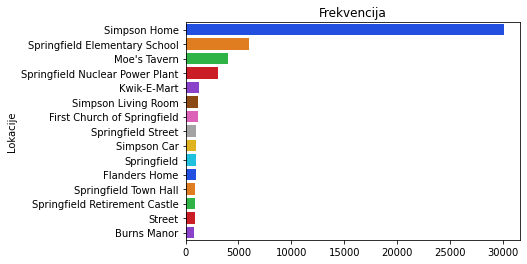

In [ ]:
fig, ax = plt.subplots(1,1)
sns.barplot(y=f_location.index, x=f_location.values, palette='bright')
ax.set_ylabel('Lokacije')
ax.set_title('Frekvencija')
plt.show()

Pomoću NRCLex odredit ćemo kakve emocionalne učinke imaju pojedini dijelovi teksta.

In [ ]:
!pip install nrclex

     |████████████████████████████████| 396 kB 21.1 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=84e1360f98646e69f335cb8a789853702136c483e06a95125a90afedddb32bce
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [ ]:
from nrclex import NRCLex

In [ ]:
text = " ".join(line for line in data_sl.spoken_words)
text_object = NRCLex(text)

In [ ]:
text_object.raw_emotion_scores

{'anger': 16693,
 'anticipation': 29011,
 'disgust': 13928,
 'fear': 21162,
 'joy': 27512,
 'negative': 38877,
 'positive': 51340,
 'sadness': 19525,
 'surprise': 15864,
 'trust': 32305}

Iz ovog popisa vidimo da pozitivne i negativne emocije predvode s brojem bodova (51340 i 38877 redom), a zatim slijede anticipation, joy, trust koji također imaju puno bodova. Radi bolje preglednosti pogledajmo relativne frekvencije svih prepoznatih emocija.

In [ ]:
text_object.top_emotions

[('positive', 0.1928501936390238)]

Najčešći osjećaj je pozitivnost, s približno 19% učestalosti. 

In [ ]:
text_object.affect_frequencies

{'anger': 0.0627044854385708,
 'anticip': 0.0,
 'anticipation': 0.10897500910911023,
 'disgust': 0.05231822160117498,
 'fear': 0.07949154261373241,
 'joy': 0.1033442642656179,
 'negative': 0.14603500152131532,
 'positive': 0.1928501936390238,
 'sadness': 0.07334242366189987,
 'surprise': 0.05959048445441125,
 'trust': 0.12134837369514344}

Vidimo da su najfrekventnije sljedeće emocije: pozitivne emocije s približno 19%, negativne emocije s 14%, povjerenje s 12%, očekivanje s 10% i sreća s 10%.

Provjerimo koje emocije izazivaju glavni likovi. Počnimo s Homerom.

In [ ]:
homer_sl=data_sl[data_sl.raw_character_text=='Homer Simpson']

In [ ]:
text = " ".join(line for line in homer_sl.spoken_words)

In [ ]:
text_object = NRCLex(text)

In [ ]:
text_object.raw_emotion_scores

{'anger': 3446,
 'anticipation': 6377,
 'disgust': 3175,
 'fear': 4403,
 'joy': 6143,
 'negative': 8510,
 'positive': 10870,
 'sadness': 4264,
 'surprise': 3398,
 'trust': 6501}

In [ ]:
text_object.affect_frequencies

{'anger': 0.06036400581568483,
 'anticip': 0.0,
 'anticipation': 0.1117066932926936,
 'disgust': 0.05561686548601258,
 'fear': 0.07712789251493335,
 'joy': 0.10760768651356702,
 'negative': 0.14907071662550142,
 'positive': 0.1904111268765218,
 'sadness': 0.0746930124196402,
 'surprise': 0.05952318391227425,
 'trust': 0.11387881654317095}

Homerove rečenice najviše izazivaju pozitivne emocije (19%), zatim negativne emocije (14%), a slijede očekivanje (anticipation) (11%), sreća (10%) i povjerenje (11%).

Pogledajmo koje su emocije vezane uz Marge.

In [ ]:
marge_sl=data_sl[data_sl.raw_character_text=='Marge Simpson']

In [ ]:
text = " ".join(line for line in marge_sl.spoken_words)

In [ ]:
text_object = NRCLex(text)

In [ ]:
text_object.affect_frequencies

{'anger': 0.05457888084568539,
 'anticip': 0.0,
 'anticipation': 0.12290780956758206,
 'disgust': 0.041862959132866064,
 'fear': 0.0662606763951128,
 'joy': 0.12244819793940787,
 'negative': 0.12340572216477076,
 'positive': 0.20965950438546097,
 'sadness': 0.06591596767398215,
 'surprise': 0.06469033666551764,
 'trust': 0.1282699452296143}

In [ ]:
text_object.raw_emotion_scores

{'anger': 1425,
 'anticipation': 3209,
 'disgust': 1093,
 'fear': 1730,
 'joy': 3197,
 'negative': 3222,
 'positive': 5474,
 'sadness': 1721,
 'surprise': 1689,
 'trust': 3349}

Margeine rečenice i karakter, očito su nešto topliji i pristupačniji nego Homer o čemu govori veći udio pozitivnih emocija (21%), manje negativnih (12%) te više izražena sreća (12%) nego kod Homera.

Bart...

In [ ]:
bart_sl=data_sl[data_sl.raw_character_text=='Bart Simpson']
text = " ".join(line for line in bart_sl.spoken_words)

In [ ]:
text_object = NRCLex(text)

In [ ]:
text_object.affect_frequencies

{'anger': 0.06781352468754455,
 'anticip': 0.0,
 'anticipation': 0.10174404790191513,
 'disgust': 0.058451741671814855,
 'fear': 0.08820035166088486,
 'joy': 0.09271491707456161,
 'negative': 0.16119374613885853,
 'positive': 0.17578292068621396,
 'sadness': 0.07869600342156537,
 'surprise': 0.05792900251865228,
 'trust': 0.11747374423798888}

Barta pozitivne i negativne emocije karakteriziraju gotovo jednako, s udjelima 16% i 17% redom, a zatim slijede očekivanje, strah i tuga, što odgovara njegovom karakteru. Bart je buntovno najstarije dijete, neshvaćen i nemiran.

Mr. Burns

In [ ]:
burns_sl=data_sl[data_sl.raw_character_text=='C. Montgomery Burns']
text=" ".join(line for line in burns_sl.spoken_words)

In [ ]:
text_object=NRCLex(text)

In [ ]:
text_object.affect_frequencies

{'anger': 0.06478167501789549,
 'anticip': 0.0,
 'anticipation': 0.11083273681698878,
 'disgust': 0.05535671677403961,
 'fear': 0.08064900978286806,
 'joy': 0.10713433548079217,
 'negative': 0.1429253161536626,
 'positive': 0.1931519923645908,
 'sadness': 0.06692913385826772,
 'surprise': 0.05941302791696493,
 'trust': 0.11882605583392986}

Za Mr. Burnsa izražen je udio negativnih emocija (14%), očekivanja (11%) i straha (8%), no pomalo je iznenađujuć udio pozitivnih emocija (19%) s obzirom da je poznat kao omražen lik zbog trovanja i zagađenja okoliša u Springfieldu.

Ned Flanders...

In [ ]:
ned_sl=data_sl[data_sl.raw_character_text=='Ned Flanders']
text=" ".join(line for line in ned_sl.spoken_words)

In [ ]:
text_object = NRCLex(text)

In [ ]:
text_object.affect_frequencies

{'anger': 0.060406952098346754,
 'anticip': 0.0,
 'anticipation': 0.12208562950402713,
 'disgust': 0.04726579058923273,
 'fear': 0.07609156422212802,
 'joy': 0.10936837643069097,
 'negative': 0.12526494277236117,
 'positive': 0.20072064434082237,
 'sadness': 0.06252649427723611,
 'surprise': 0.06337431114879186,
 'trust': 0.13289529461636287}

Uočimo da je za Ned Flandersa primijećen puno veći udio pozitivnih emocija, čak 20%, manje negativnih (12%), a također je veći udio emocija joy i trust. Stoga možemo zaključiti sljedeće...

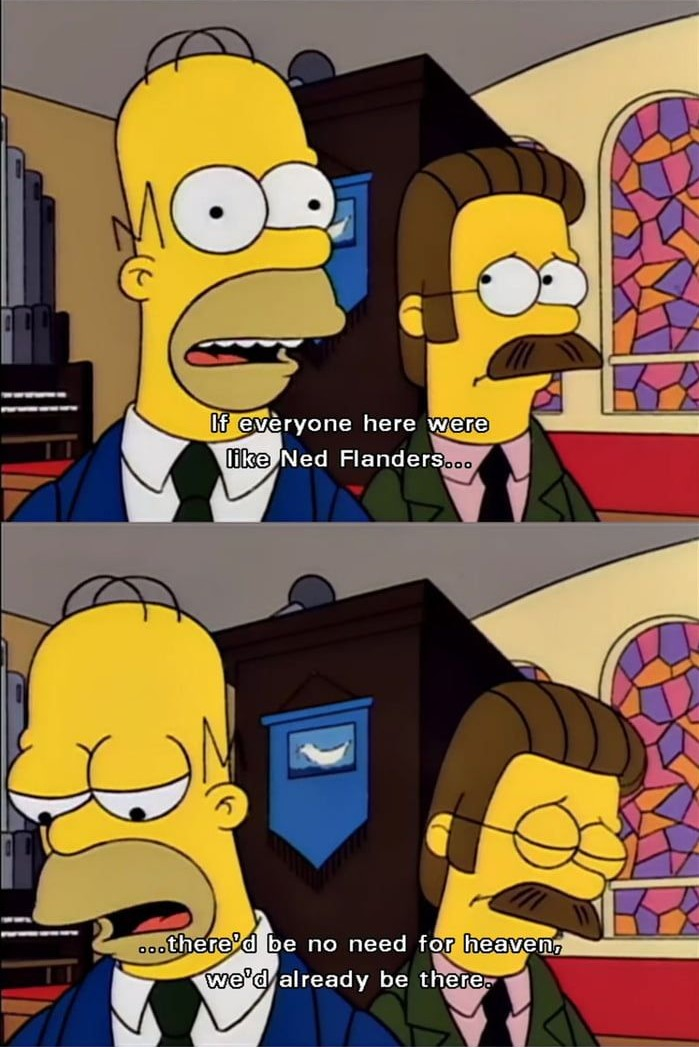